In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Mall_Customers.csv', index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [3]:
df.shape

(200, 4)

In [4]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [5]:
df.describe(include='all')

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


In [6]:
df.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Creating X

In [7]:
X = df.values[:,[2,3]]

In [8]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


# elbow method

C:\Users\kes\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


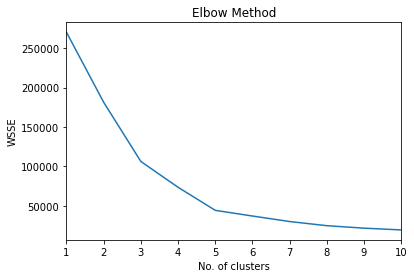

In [9]:
from sklearn.cluster import KMeans
wsse = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(X)
    wsse.append(kmeans.inertia_)
plt.plot(range(1,11),wsse)
plt.xlim(1,10)
plt.title('Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('WSSE')
plt.show()

In [10]:
print(wsse)

[269981.28000000014, 181363.59595959607, 106348.37306211119, 73679.78903948837, 44448.45544793369, 37271.88623658948, 30273.394312070028, 25022.485004530332, 21881.87850706096, 19669.71099830122]


# fiting kmeans to the dataset

In [11]:
kmeans = KMeans(n_clusters = 5, random_state = 10)
y_pred = kmeans.fit_predict(X)

In [12]:
y_pred

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [13]:
y_pred.shape

(200,)

In [14]:
kmeans.inertia_

44448.45544793369

In [15]:
kmeans.n_iter_

5

# Alocating Cluster to the data

In [16]:
df['cluster'] = y_pred
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
CustomerID,,,,,
1,Male,19,15,39,3
2,Male,21,15,81,0
3,Female,20,16,6,3
4,Female,23,16,77,0
5,Female,31,17,40,3
...,...,...,...,...,...
196,Female,35,120,79,2
197,Female,45,126,28,4
198,Male,32,126,74,2


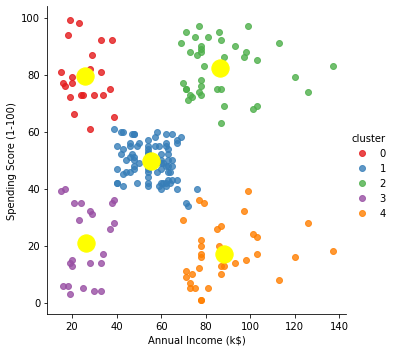

In [24]:
sns.lmplot(data = df, x= 'Annual Income (k$)', y = 'Spending Score (1-100)',fit_reg = False, palette = 'Set1', hue = 'cluster')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow')
plt.show()

In [29]:
kmeans.cluster_centers_[:,0]

array([25.72727273, 55.2962963 , 86.53846154, 26.30434783, 88.2       ])

In [30]:
kmeans.cluster_centers_[:,1]

array([79.36363636, 49.51851852, 82.12820513, 20.91304348, 17.11428571])

In [31]:
df['cluster'] = df.cluster.map({0:'Careless',1:'Standard',2:'Target',3:'Sensable',4:'Careful'})
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
CustomerID,,,,,
1,Male,19,15,39,Sensable
2,Male,21,15,81,Careless
3,Female,20,16,6,Sensable
4,Female,23,16,77,Careless
5,Female,31,17,40,Sensable
...,...,...,...,...,...
196,Female,35,120,79,Target
197,Female,45,126,28,Careful
198,Male,32,126,74,Target
